In [1]:
ls

SRR11125758.gather.with-lineages.csv  Snakefile~
SRR11183406.gather.with-lineages.csv  analyze.ipynb
SRR19906171.gather.with-lineages.csv  outputs/
SRR22460774.gather.with-lineages.csv  sra-list.txt
Snakefile


In [2]:
ls outputs/raw/*.gather.csv

outputs/raw/SRR11124890.gather.csv  outputs/raw/SRR11183406.gather.csv
outputs/raw/SRR11125758.gather.csv  outputs/raw/SRR16235693.gather.csv
outputs/raw/SRR11125888.gather.csv  outputs/raw/SRR19906171.gather.csv
outputs/raw/SRR11126167.gather.csv  outputs/raw/SRR22460774.gather.csv
outputs/raw/SRR11126428.gather.csv


In [3]:
ls outputs/asm/*.with-lineages.csv

outputs/asm/SRR11124890.gather.with-lineages.csv
outputs/asm/SRR11125758.gather.with-lineages.csv
outputs/asm/SRR11125888.gather.with-lineages.csv
outputs/asm/SRR11126167.gather.with-lineages.csv
outputs/asm/SRR11126428.gather.with-lineages.csv
outputs/asm/SRR11183406.gather.with-lineages.csv
outputs/asm/SRR16235693.gather.with-lineages.csv
outputs/asm/SRR19906171.gather.with-lineages.csv
outputs/asm/SRR22460774.gather.with-lineages.csv


In [4]:
import pandas as pd
from matplotlib_venn import venn2

In [29]:
acc = "SRR11126167"

asm_df = pd.read_csv(f'outputs/asm/{acc}.gather.with-lineages.csv')
raw_df = pd.read_csv(f'outputs/raw/{acc}.gather.with-lineages.csv')

In [30]:
print(len(asm_df))
print(len(raw_df))

25
539


In [31]:
def get_species(lineage_str):
    species = lineage_str.split(';')[-1]
    assert species.startswith('s__')
    return species

def get_genus(lineage_str):
    genus = lineage_str.split(';')[-2]
    assert genus.startswith('g__')
    return genus

In [32]:
raw_df['species'] = raw_df['lineage'].apply(get_species)
asm_df['species'] = asm_df['lineage'].apply(get_species)

raw_df['genus'] = raw_df['lineage'].apply(get_genus)
asm_df['genus'] = asm_df['lineage'].apply(get_genus)


In [33]:
raw_species = set(raw_df['species'])
asm_species = set(asm_df['species'])

raw_genus = set(raw_df['genus'])
asm_genus = set(asm_df['genus'])

In [34]:
asm_species - raw_species

{'s__Azonexus sp009469585'}

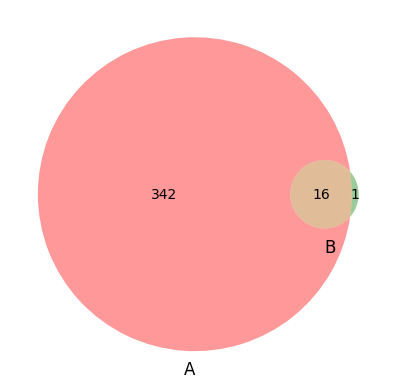

In [35]:
venn2([raw_species, asm_species])

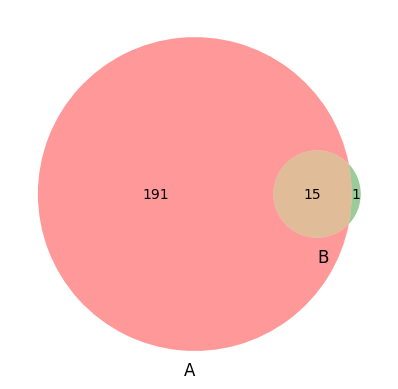

In [36]:
venn2([raw_genus, asm_genus])

In [44]:
def jaccard_twixt_asm_raw(acc):
    asm_df = pd.read_csv(f'outputs/asm/{acc}.gather.with-lineages.csv')
    raw_df = pd.read_csv(f'outputs/raw/{acc}.gather.with-lineages.csv')
    
    raw_df['species'] = raw_df['lineage'].apply(get_species)
    asm_df['species'] = asm_df['lineage'].apply(get_species)

    raw_df['genus'] = raw_df['lineage'].apply(get_genus)
    asm_df['genus'] = asm_df['lineage'].apply(get_genus)
    
    raw_species = set(raw_df['species'])
    asm_species = set(asm_df['species'])

    raw_genus = set(raw_df['genus'])
    asm_genus = set(asm_df['genus'])
    
    jaccard_genus = len(raw_genus.intersection(asm_genus)) / len(raw_genus.union(asm_genus)) * 100
    jaccard_species = len(raw_species.intersection(asm_species)) / len(raw_species.union(asm_species)) * 100
    
    return jaccard_species, jaccard_genus

jaccard_twixt_asm_raw('SRR11126167')

(4.456824512534819, 7.246376811594203)

In [45]:
SRA_ACC="""SRR16235693                                                          
SRR11124890                                                                     
SRR11183406                                                                     
SRR11126167    
SRR22460774                                                      
SRR11125758                          
SRR11125888                                                                     
SRR11126428                                                                     
SRR19906171                                                                     
""".splitlines()
SRA_ACC = [ x.strip() for x in SRA_ACC ]


In [52]:
x = []
for acc in SRA_ACC:
    jaccard_species, jaccard_genus = jaccard_twixt_asm_raw(acc)
    x.append(dict(acc=acc, species=jaccard_species, genus=jaccard_genus))
    
jaccard_df = pd.DataFrame.from_dict(x)
#print(jaccard_df.sort_values(by='genus').to_markdown())
jaccard_df


,acc,species,genus
0,SRR16235693,34.408602,40.196078
1,SRR11124890,1.072386,2.000000
2,SRR11183406,3.232759,4.508197
3,SRR11126167,4.456825,7.246377
4,SRR22460774,7.909605,11.290323
5,SRR11125758,4.278075,6.349206
6,SRR11125888,3.669725,5.970149
7,SRR11126428,6.842105,9.859155
8,SRR19906171,18.691589,29.787234
